# Markov chains

In [19]:
p = 0.1

M = [1-p  p
      0   1]

2×2 Array{Float64,2}:
 0.9  0.1
 0.0  1.0

In [2]:
M = [1-p  p; 0 1]

2×2 Array{Float64,2}:
 0.9  0.1
 0.0  1.0

In [4]:
P0 = [1.0  0.0]   # no comma: row vector

1×2 Array{Float64,2}:
 1.0  0.0

In [5]:
P1 = P0 * M

1×2 Array{Float64,2}:
 0.9  0.1

In [6]:
P2 = P1 * M

1×2 Array{Float64,2}:
 0.81  0.19

In [7]:
P3 = P2 * M

1×2 Array{Float64,2}:
 0.729  0.271

In [12]:
function dynamics(P0, M, n)
    P = copy(P0)
    
    for i in 1:n
        new_P = P * M
        
        # P = copy(new_P)
        
        P, new_P = new_P, P   # swaps "pointers" P and new_P
    end
    
    return P
end

dynamics (generic function with 1 method)

In [11]:
# Alternatives:

# P *= M   # equiv to P = P * M  -- first does P * M, which creates a new vector, 
        # and then makes P point to that vector -- bad in terms of memory usage

# P .*= M  # 

In [13]:
dynamics(P0, M, 1)

1×2 Array{Float64,2}:
 0.9  0.1

In [14]:
dynamics(P0, M, 2)

1×2 Array{Float64,2}:
 0.81  0.19

In [15]:
dynamics(P0, M, 10)

1×2 Array{Float64,2}:
 0.348678  0.651322

In [16]:
dynamics(P0, M, 100)

1×2 Array{Float64,2}:
 2.65614e-5  0.999973

In [17]:
0.9^100  

2.6561398887587544e-5

$$P_0^{(n)} = (1-p)^{n-1}$$

Suppose small chance of re-infection after recovery:

In [20]:
M2 = [1-p  p
      0.01   0.99]

2×2 Array{Float64,2}:
 0.9   0.1
 0.01  0.99

In [21]:
for n in 1:10
    @show dynamics(P0, M2, n)
end

dynamics(P0, M2, n) = [0.9 0.1]
dynamics(P0, M2, n) = [0.811 0.189]
dynamics(P0, M2, n) = [0.73179 0.26821]
dynamics(P0, M2, n) = [0.6612931000000001 0.33870690000000003]
dynamics(P0, M2, n) = [0.598550859 0.40144914100000006]
dynamics(P0, M2, n) = [0.54271026451 0.45728973549000007]
dynamics(P0, M2, n) = [0.49301213541390004 0.5069878645861001]
dynamics(P0, M2, n) = [0.44878080051837105 0.5512191994816291]
dynamics(P0, M2, n) = [0.40941491246135026 0.5905850875386499]
dynamics(P0, M2, n) = [0.37437927209060173 0.6256207279093984]


In [29]:
data2 = [dynamics(P0, M2, n) for n in 1:1000]


1000-element Array{Array{Float64,2},1}:
 [0.9 0.1]
 [0.811 0.189]
 [0.73179 0.26821]
 [0.6612931000000001 0.33870690000000003]
 [0.598550859 0.40144914100000006]
 [0.54271026451 0.45728973549000007]
 [0.49301213541390004 0.5069878645861001]
 [0.44878080051837105 0.5512191994816291]
 [0.40941491246135026 0.5905850875386499]
 [0.37437927209060173 0.6256207279093984]
 [0.3431975521606356 0.6568024478393646]
 [0.3154458214229657 0.6845541785770345]
 [0.2907467810664395 0.7092532189335607]
 ⋮
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]

In [30]:
data1 = [dynamics(P0, M, n) for n in 1:1000]


1000-element Array{Array{Float64,2},1}:
 [0.9 0.1]
 [0.81 0.19]
 [0.7290000000000001 0.271]
 [0.6561000000000001 0.34390000000000004]
 [0.5904900000000002 0.40951000000000004]
 [0.5314410000000002 0.46855900000000006]
 [0.47829690000000014 0.5217031000000001]
 [0.43046721000000016 0.5695327900000001]
 [0.38742048900000015 0.6125795110000002]
 [0.34867844010000015 0.6513215599000002]
 [0.31381059609000017 0.6861894039100002]
 [0.28242953648100017 0.7175704635190002]
 [0.25418658283290013 0.7458134171671003]
 ⋮
 [5.569828659391132e-46 1.0]
 [5.012845793452018e-46 1.0]
 [4.511561214106817e-46 1.0]
 [4.060405092696135e-46 1.0]
 [3.654364583426521e-46 1.0]
 [3.2889281250838693e-46 1.0]
 [2.9600353125754822e-46 1.0]
 [2.664031781317934e-46 1.0]
 [2.397628603186141e-46 1.0]
 [2.157865742867527e-46 1.0]
 [1.942079168580774e-46 1.0]
 [1.7478712517226966e-46 1.0]

In [34]:
data1 = [dynamics(big.(P0), big.(M), n) for n in 1:1000]


1000-element Array{Array{BigFloat,2},1}:
 [0.90000000000000002220446049250313080847263336181640625 0.1000000000000000055511151231257827021181583404541015625]
 [0.8100000000000000399680288865056359482888058144019096323303533017413935457540219 0.1900000000000000127675647831893003381312806238275281893325883254353483864385055]
 [0.7290000000000000539568389967826091957912766296712997674362064523351291651732287 0.2710000000000000212607709215717481435429990544451144271503457758014564845125599]
 [0.6561000000000000647482067961391318336711984918800389746448261819435354487933681 0.3439000000000000307032177460087049524868890987062116998820265147454492010642484]
 [0.5904900000000000728417326456565242114419731566738477862317211245261222302138236 0.4095100000000000408201250579054445261384825763896687746093535231340378275185354]
 [0.5314410000000000786690712573090471188041558507812798257323740177853629880026913 0.4685590000000000513821762915256407794092748945007577577634818870146132957424792]
 [0.478

**Stationary state**

Unchanging probability vector -- **eigenvector** $v$ of the transition matrix:

$$ M v = \lambda v$$

In [35]:
v = data2[end]

1×2 Array{Float64,2}:
 0.0909091  0.909091

In [38]:
v * M2 == v

true

In [40]:
v * M2 == 1.0 .*  v  # eigenvector with eigenvalue 1

true

`dynamics` multiplies repeatedly by the matrix

In [41]:
3^100

-2984622845537545263

In [42]:
v * M^10

1×2 Array{Float64,2}:
 0.031698  0.968302

In [44]:
v * M2^100

1×2 Array{Float64,2}:
 0.0909091  0.909091

## Continuous limit

Back to the recovery model. We have talking about the number of people that recover each *day*

$A \rightarrow B$

Chemical reactions: **Continuous time**:  $t \in \mathbb{R}$

Probability of recovering at time $n$ is $p_n := p (1-p)^{n-1}$

**Cumulative** Probability of having recovered at some time <= $n$:

$s_N := \sum_{n=1}^N p_n$

In [46]:
p = 0.1

probs = [p * (1 - p)^(n-1) for n in 1:20]

20-element Array{Float64,1}:
 0.1
 0.09000000000000001
 0.08100000000000002
 0.0729
 0.06561
 0.05904900000000001
 0.05314410000000001
 0.04782969000000001
 0.04304672100000001
 0.03874204890000001
 0.03486784401000001
 0.031381059609000006
 0.028242953648100012
 0.02541865828329001
 0.02287679245496101
 0.02058911320946491
 0.018530201888518418
 0.016677181699666577
 0.015009463529699918
 0.013508517176729929

In [47]:
s = cumsum(probs)

20-element Array{Float64,1}:
 0.1
 0.19
 0.271
 0.3439000000000001
 0.40951000000000004
 0.46855900000000006
 0.5217031000000001
 0.5695327900000001
 0.6125795110000002
 0.6513215599000002
 0.6861894039100002
 0.7175704635190002
 0.7458134171671003
 0.7712320754503903
 0.7941088679053513
 0.8146979811148162
 0.8332281830033346
 0.8499053647030012
 0.864914828232701
 0.878423345409431

In [48]:
using Plots

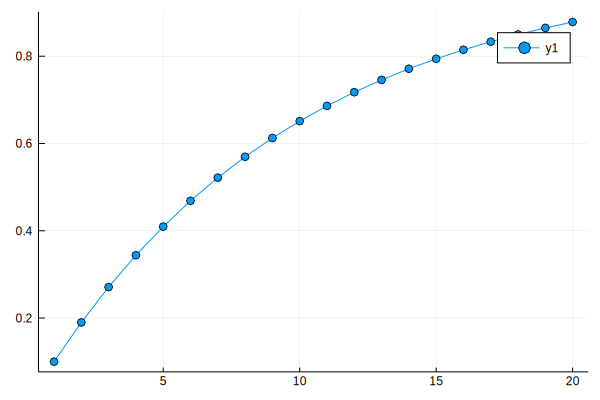

In [50]:
plot(s, m=:o)

In [58]:
ys = [0; reduce(vcat, [ [s[n], s[n]] for n in 1:20 ])]

pop!(ys)
pushfirst!(ys, 0)

41-element Array{Float64,1}:
 0.0
 0.0
 0.1
 0.1
 0.19
 0.19
 0.271
 0.271
 0.3439000000000001
 0.3439000000000001
 0.40951000000000004
 0.40951000000000004
 0.46855900000000006
 ⋮
 0.7712320754503903
 0.7941088679053513
 0.7941088679053513
 0.8146979811148162
 0.8146979811148162
 0.8332281830033346
 0.8332281830033346
 0.8499053647030012
 0.8499053647030012
 0.864914828232701
 0.864914828232701
 0.878423345409431

In [59]:
xs = [0; reduce(vcat, [ [n, n] for n in 1:20 ])];

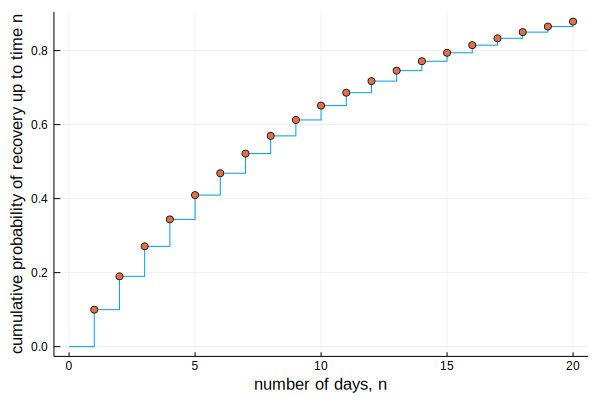

In [68]:
plot(xs, ys, leg=false)
scatter!(s)

ylabel!("cumulative probability of recovery up to time n")
xlabel!("number of days, n")

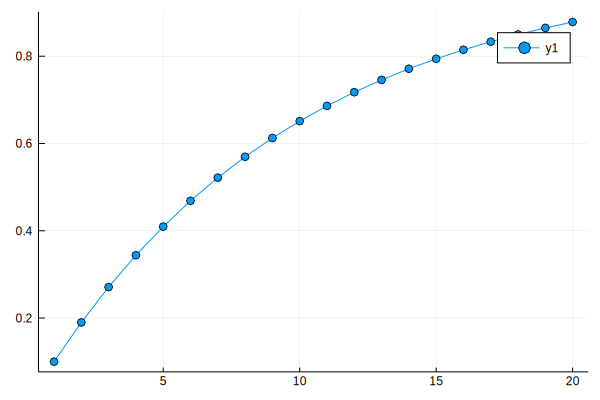

In [70]:
plot(s, m=:o)

Think of our discrete-time process in steps, not of days, but of a time $\delta$

Instead of "cumulative probability that have decayed by day $n$", want to talk about
"cumulative probability that have decayed by time $n \delta$

What is the probability $p(\delta)$ of recovering in time $\delta$